In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the API endpoint and headers
url = "https://api.coingecko.com/api/v3/ping"
headers = {
    "x-cg-demo-api-key": "*****"  
}

# Send the GET request
response = requests.get(url, headers=headers)

# Check the status code and print the response
if response.status_code == 200:
    print("Response:", response.json())
else:
    print(f"Error: {response.status_code}, Message: {response.text}")


Response: {'gecko_says': '(V3) To the Moon!'}


In [ ]:
# Define the endpoint and parameters
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"

headers = {
    "x-cg-demo-api-key": "*****"  
}

params = {
    "vs_currency": "usd",
    "days": "365",  # Last 365 days
    "interval": "daily"
}

# Send a GET request
response = requests.get(url, params=params, headers=headers)

# Process the response
data = response.json()

# Extract prices and format as DataFrame
prices = data['prices']
df = pd.DataFrame(prices, columns=["Timestamp", "Price"])
df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.drop('Timestamp', axis=1, inplace=True)

# Preview the DataFrame
print(df.head())

          Price       Date
0  43634.124168 2023-12-21
1  43849.699599 2023-12-22
2  44003.696022 2023-12-23
3  43752.030885 2023-12-24
4  43034.971063 2023-12-25


In [4]:
df.dropna(inplace=True)

In [5]:
df['Daily Return'] = df['Price'].pct_change()

In [6]:
print(df.describe())

               Price  Daily Return
count     366.000000    365.000000
mean    64259.662417      0.002661
std     14195.916516      0.027559
min     39504.730058     -0.082359
25%     57992.779281     -0.011103
50%     63759.090612      0.001192
75%     68416.279565      0.014567
max    106074.107235      0.122669


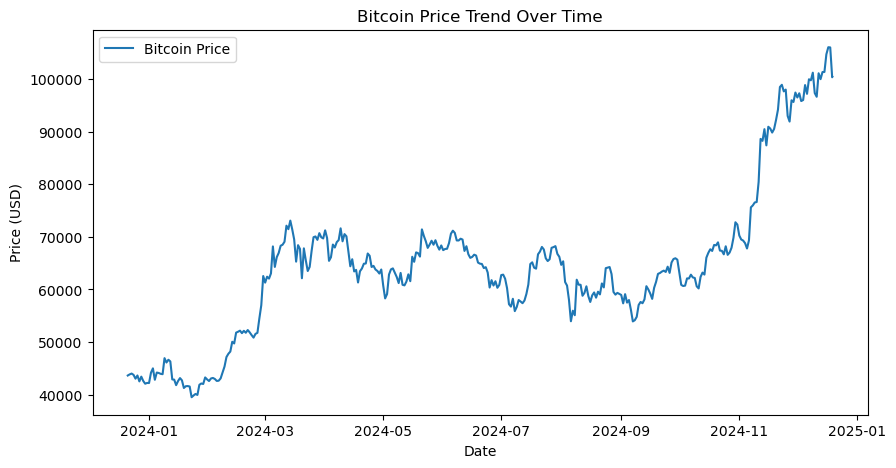

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label='Bitcoin Price')
plt.title('Bitcoin Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

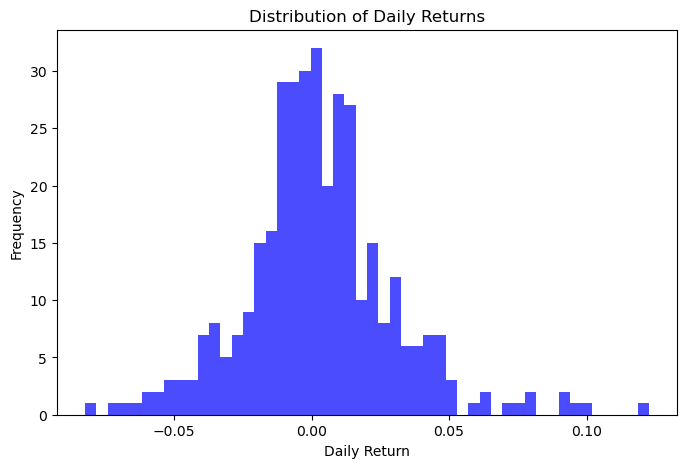

In [13]:
# Volatility Analysis
plt.figure(figsize=(8, 5))
plt.hist(df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

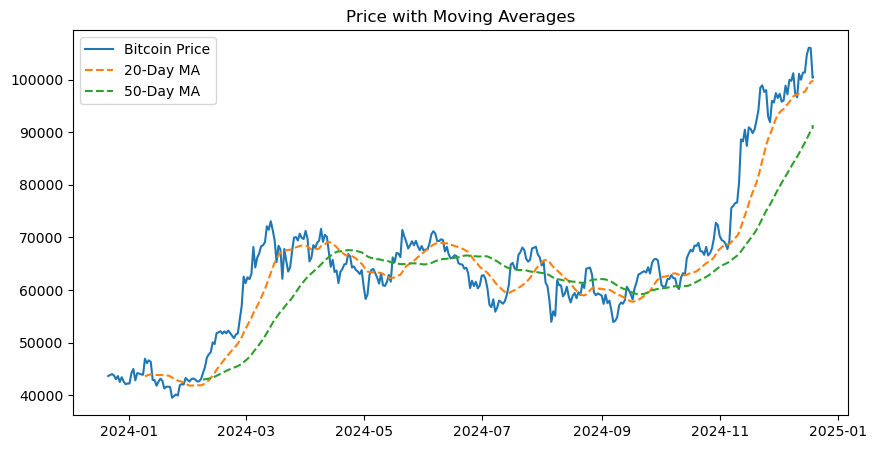

In [9]:
df['MA_20'] = df['Price'].rolling(window=20).mean()  # 20-day moving average
df['MA_50'] = df['Price'].rolling(window=50).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label='Bitcoin Price')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA', linestyle='--')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', linestyle='--')
plt.title('Price with Moving Averages')
plt.legend()
plt.show()

In [14]:
#Predictive model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
df['Volatility'] = df['Price'].pct_change().rolling(window=20).std()
X = df[['MA_20', 'MA_50', 'Volatility']].dropna()
y = df['Price'][X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)


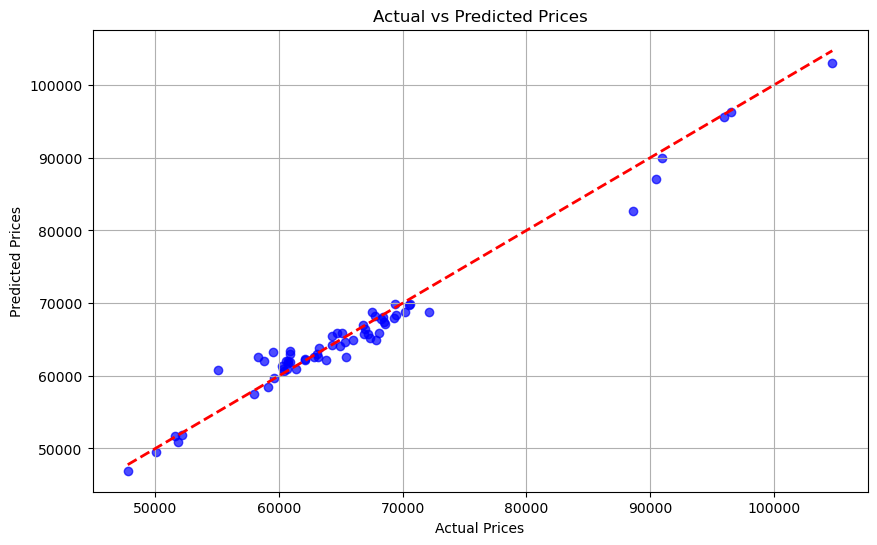

In [15]:
# Create a scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [17]:
df.to_csv('cryptocurrency_analysis.csv', index=False)